**LOAD DATA FROM EXCEL FILE**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load the dataset from Excel
file_path = 'SONOS_data_ProgThreshold.xlsx'
data = pd.read_excel(file_path)


**PREPARE THE DATA**

In [3]:
# Convert SONOSstate to numerical values (Programmed -> 1, Erased -> 0)
data['SONOSstate'] = data['SONOSstate'].map({'programmed': 1, 'erased': 0})

# Define input and output variables
X = data[['Cycles', 'Vgp', 'dtp', 'Vge', 'dte', 'SONOSstate']]
y = data['Vtgm']  # Program threshold voltage

# Split data into training and testing sets (80% train, 20% test)
n_train = int(0.8 * len(data))
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**PREPROCESS AND TRAIN THE MODEL**

In [4]:
# Define the neural network model
model = Sequential()

# Input Layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden Layer 1
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Hidden Layer 3
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Learning rate scheduler
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=32, callbacks=[lr_reduction])

# Save the trained model
model.save('program_threshold_nn_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 6.7657 - mae: 2.1531 - val_loss: 1.1973 - val_mae: 1.0725 - learning_rate: 0.0010
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 5.3972 - mae: 1.9620 - val_loss: 1.1209 - val_mae: 1.0409 - learning_rate: 0.0010
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5.7357 - mae: 1.9986 - val_loss: 0.9319 - val_mae: 0.9470 - learning_rate: 0.0010
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 4.5548 - mae: 1.6846 - val_loss: 0.7532 - val_mae: 0.8480 - learning_rate: 0.0010
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.9929 - mae: 1.6551 - val_loss: 0.6412 - val_mae: 0.7800 - learning_rate: 0.0010
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 4.0195 - mae: 1.6742 - val_loss: 0.5778 - val_mae: 0.7374 - learning_rate: 0.0010
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.8710 - mae: 1.6097 - val_loss: 0.5306 - val_mae: 0.7022 - learning_rate: 0.0010
Epoch 8/200
3/3 ━━━

**EVALUATE THE MODEL ON TESTING DATA**

In [5]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error on the test set: {mae}')

# Predictions on test data
y_pred = model.predict(X_test_scaled)

# Compare first 5 predictions with actual values
print("Predicted vs Actual Program Threshold Voltage Values:")
for i in range(5):
    print(f"Sample {i+1}: Predicted = {y_pred[i][0]:.4f}, Actual = {y_test.iloc[i]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0900 - mae: 0.2438
Mean Absolute Error on the test set: 0.24378010630607605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicted vs Actual Program Threshold Voltage Values:
Sample 1: Predicted = 1.2711, Actual = 1.2270
Sample 2: Predicted = 0.8432, Actual = 0.5550
Sample 3: Predicted = 1.3867, Actual = 1.2270
Sample 4: Predicted = 0.9349, Actual = 0.5820
Sample 5: Predicted = 0.8359, Actual = 1.2270


PREDICT VALUES AND PLOT GRAPHS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


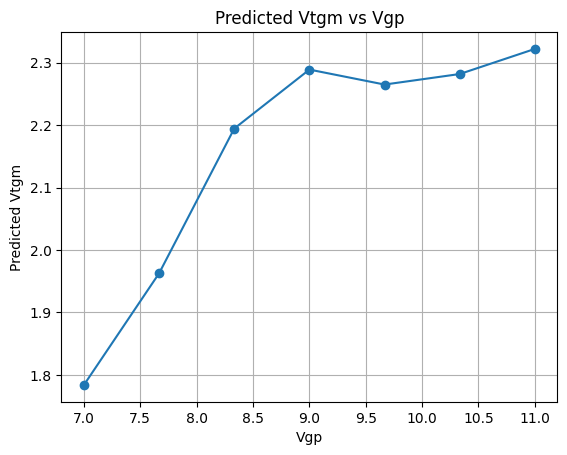

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


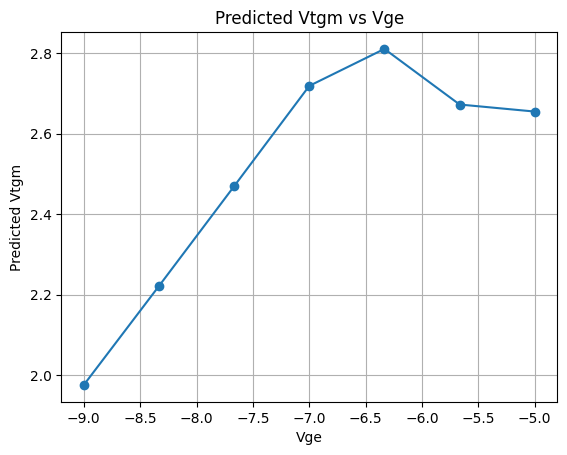

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


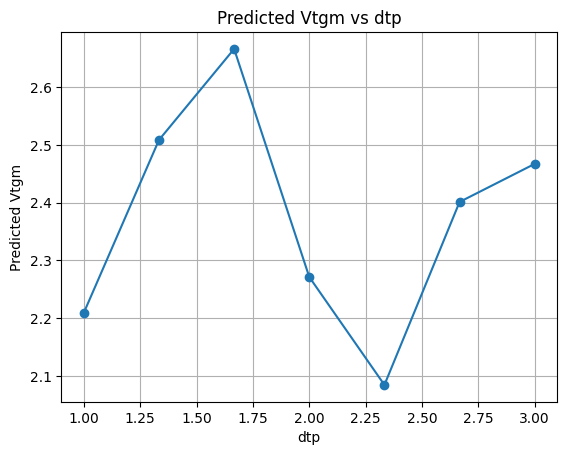

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load trained model
model = load_model('program_threshold_nn_model.h5')

# Load and process original dataset
data = pd.read_excel('SONOS_data_ProgThreshold.xlsx')
data['SONOSstate'] = data['SONOSstate'].map({'programmed': 1, 'erased': 0})
scaler = StandardScaler()
scaler.fit(data[['Cycles', 'Vgp', 'dtp', 'Vge', 'dte', 'SONOSstate']])

# Base input sample
base_input = {
    'Cycles': 1,
    'Vgp': 9,
    'dtp': 1.888888889,
    'Vge': -8,
    'dte': 7.5,
    'SONOSstate': 1  # Programmed
}

# Function to create varied samples
def create_variants(key, values):
    return pd.DataFrame([{**base_input, key: v} for v in values])

# Function to predict and plot
def predict_and_plot(df, variable_name):
    X_scaled = scaler.transform(df)
    predictions = model.predict(X_scaled).flatten()
    plt.plot(df[variable_name], predictions, marker='o')
    plt.xlabel(variable_name)
    plt.ylabel('Predicted Vtgm')
    plt.title(f'Predicted Vtgm vs {variable_name}')
    plt.grid(True)
    plt.show()
    return pd.DataFrame({variable_name: df[variable_name], 'Predicted_Vtgm': predictions})

# Generate variations and predict
vgp_vals = np.linspace(7, 11, 7)
df_vgp = create_variants('Vgp', vgp_vals)
results_vgp = predict_and_plot(df_vgp, 'Vgp')

vge_vals = np.linspace(-9, -5, 7)
df_vge = create_variants('Vge', vge_vals)
results_vge = predict_and_plot(df_vge, 'Vge')

dtp_vals = np.linspace(1.0, 3.0, 7)
df_dtp = create_variants('dtp', dtp_vals)
results_dtp = predict_and_plot(df_dtp, 'dtp')


PREDICT AND TRANSFER TO AN EXCEL SHEET

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('program_threshold_nn_model.h5')

# Load the original data
file_path = 'SONOS_data_ProgThreshold.xlsx'
data = pd.read_excel(file_path)

# Convert SONOSstate to numerical values
data['SONOSstate'] = data['SONOSstate'].map({'programmed': 1, 'erased': 0})

# Store original dataframe for output (to replace only the 'Vtgm' column)
output_df = data.copy()

# Prepare input features
X = data[['Cycles', 'Vgp', 'dtp', 'Vge', 'dte', 'SONOSstate']]

# Standardize input
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Predict threshold voltage
predicted_vtgm = model.predict(X_scaled).flatten()

# Replace 'Vtgm' column with predictions
output_df['Vtgm'] = predicted_vtgm

# Save to new Excel file
output_df.to_excel('SONOS_data_ProgThreshold_Predicted.xlsx', index=False)

print("Predicted data saved to 'SONOS_data_ProgThreshold_Predicted.xlsx'")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
✅ Predicted data saved to 'SONOS_data_ProgThreshold_Predicted.xlsx'


**PLOT LOSS VS EPOCHS, ACTUAL VS PREDICTED VALUES, RESIDUALS**

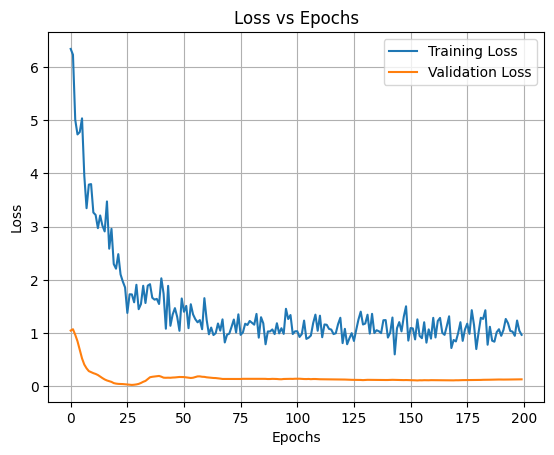

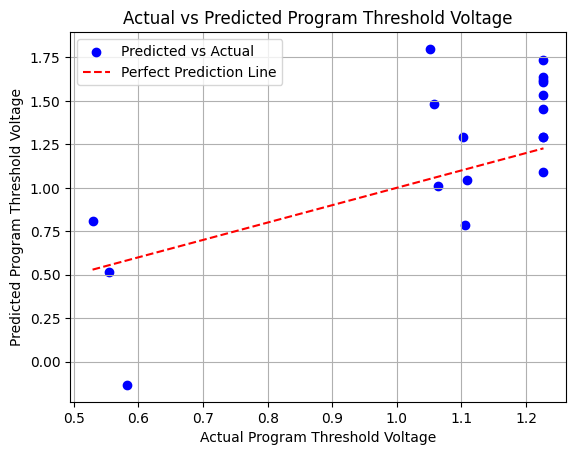

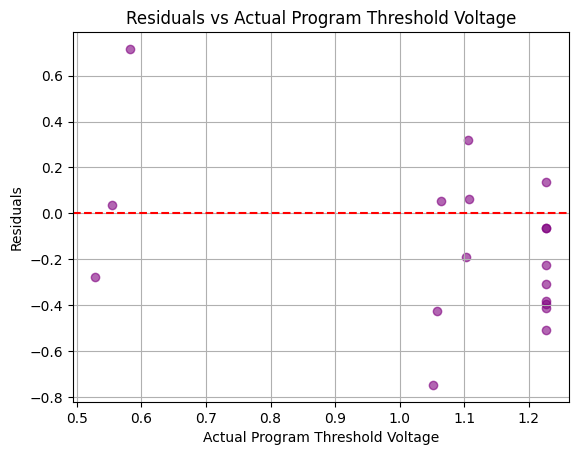

Mean of Residuals: -0.1481
Standard Deviation of Residuals: 0.3318


In [ ]:
# Plot loss vs epochs
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)

# Plot Actual vs Predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs Predicted Program Threshold Voltage')
plt.xlabel('Actual Program Threshold Voltage')
plt.ylabel('Predicted Program Threshold Voltage')
plt.legend()
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot Residuals
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Program Threshold Voltage')
plt.xlabel('Actual Program Threshold Voltage')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Print basic statistics of residuals
print(f'Mean of Residuals: {np.mean(residuals):.4f}')
print(f'Standard Deviation of Residuals: {np.std(residuals):.4f}')